In [1]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# to avoid annoying error
from sklearn.metrics import r2_score

255


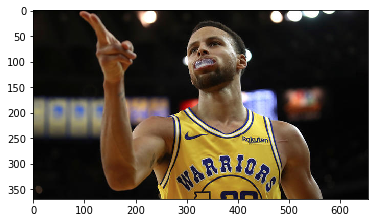

In [2]:
# plot and create list of rgb pixels in the image of Steph Curry, the goat

goat = plt.imread('goat.jpg')
plt.imshow(goat)

goat_n, goat_m, goat_rgb = goat.shape

long_goat = goat.reshape(-1, goat_rgb)

# find color scale
print(np.amax(long_goat.flatten()))

In [3]:
# create matrix coordinates for each pixel

X = [[m for m in range(goat_m)] for n in range(goat_n)]

for m in range(len(goat)):
    for n in range(len(goat[m])):
        X[m][n] = [m,n]
        
X = np.array(X)

# reshape
long_x = X.reshape(-1, 2)

In [4]:
# construct training data from random 5000 pixels 

random_index = np.random.choice(len(long_goat), 5000)
X_train = long_x[random_index]
y_train = long_goat[random_index]

In [5]:
# rescale brightness
# we can literally just divide bruh

def rescale_brightness(matrix):
    
    rescaled_matrix = []
    max_brightness = np.amax(matrix.flatten())
    
    for row in matrix:
        rescaled_row = []
        for element in row:
            element = element/max_brightness
            rescaled_row.append(element)
        rescaled_matrix.append(rescaled_row)
    
    return np.array(rescaled_matrix)

In [6]:
# we want X (feature vectors) to be our coordinates
# we want Y (labels) to be the RGB colors

X_train = rescale_brightness(X_train)
y_train = rescale_brightness(y_train)

X_test = rescale_brightness(long_x)
y_test = rescale_brightness(long_goat)

/Users/baileywei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


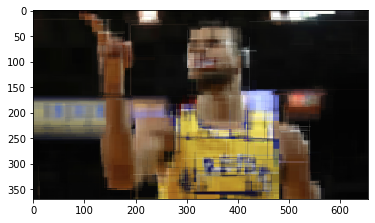

In [7]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

y_pred = y_pred.reshape(369, 656, 3)

plt.imshow(y_pred)

In [16]:
def run_rf(n_trees, m_depth, X_train, y_train, X_test, y_test):
    
    # fit model
    rf = RandomForestRegressor(n_estimators = n_trees,
                               max_depth = m_depth
                              )
    rf.fit(X_train, y_train)
    
    # predict labels of the training data
    y_pred = rf.predict(X_test)
    
#     # score the model bosed on testing data(X_test) and testing labels (y_test)
#     acc = rf.score(X_test, y_test)
#     print(acc)
    
    # to avoid the really annoying error we use r2_score instead of built in score
    acc = r2_score(y_test, y_pred)
    
    return y_pred, acc

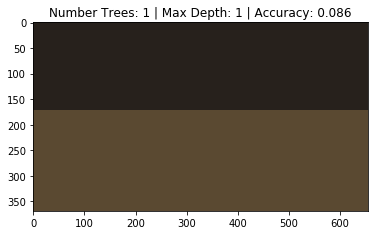

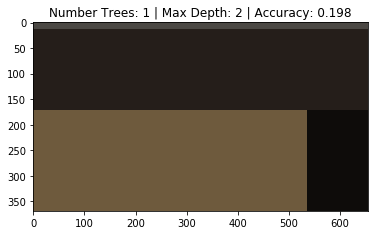

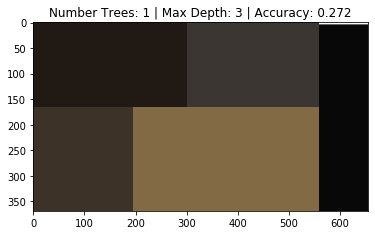

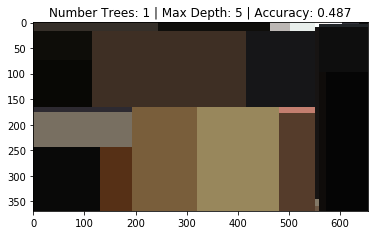

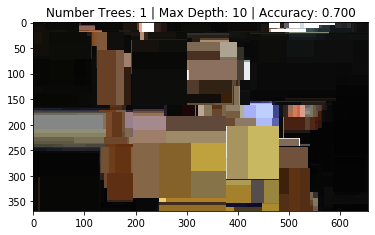

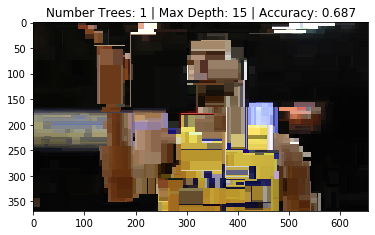

In [17]:
# parameters for 2e-i
n_trees = 1
m_depth = [1, 2, 3, 5, 10, 15]

# lists for y_predictions and corresponding accuracies 
new_pictures = []
all_acc = []

# call random forest function an store values into lis
for m in m_depth:
    y_pred, acc = run_rf(n_trees, m, X_train, y_train, X_test, y_test)
    # pyplot rescales colors that are 0->1, back up to 0->255
    new_pic = y_pred.reshape(369, 656, 3)
    new_pictures.append(new_pic)
    all_acc.append(acc)

# display pictures
for i in range(len(new_pictures)):
    plt.imshow(new_pictures[i])
    plt.title('Number Trees: {} | Max Depth: {} | Accuracy: {:.3f}'.format(n_trees, m_depth[i], all_acc[i]))
    plt.show()

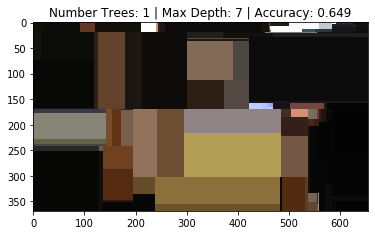

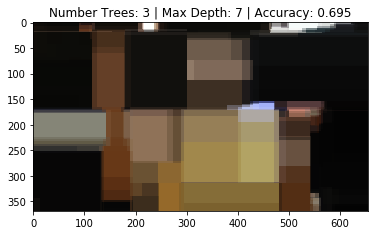

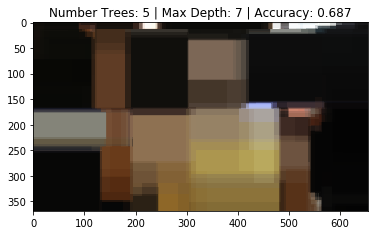

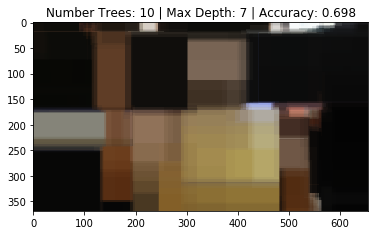

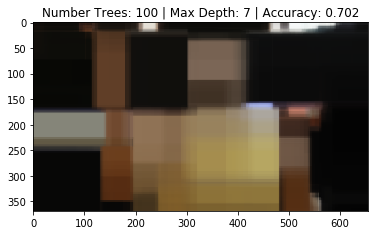

In [10]:
# parameters for 2e-ii
n_trees = [1, 3, 5, 10, 100]
m_depth = 7

# lists for y_predictions and corresponding accuracies 
new_pictures = []
all_acc = []

# call random forest function an store values into lis
for n in n_trees:
    y_pred, acc = run_rf(n, m_depth, X_train, y_train, X_test, y_test)
    # pyplot rescales colors that are 0->1, back up to 0->255
    new_pic = y_pred.reshape(369, 656, 3)
    new_pictures.append(new_pic)
    all_acc.append(acc)

# display pictures
for i in range(len(new_pictures)):
    plt.imshow(new_pictures[i])
    plt.title('Number Trees: {} | Max Depth: {} | Accuracy: {:.3f}'.format(n_trees[i], m_depth, all_acc[i]))
    plt.show()

In [11]:
# we want X (feature vectors) to be our coordinates
# we want Y (labels) to be the RGB colors

X_train = rescale_brightness(X_train)
y_train = rescale_brightness(y_train)

X_test = rescale_brightness(long_x)
y_test = rescale_brightness(long_goat)

/Users/baileywei/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8243487209521436


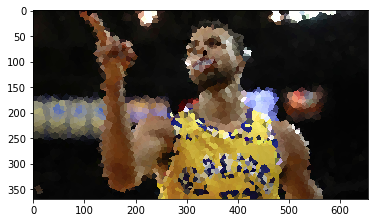

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, y_train)


acc = rf.score(X_test, y_test)
print(acc)

y_pred = knn.predict(X_test)
y_pred = y_pred.reshape(369, 656, 3)

plt.imshow(y_pred)


Best params: {'clf__max_depth': 48, 'clf__n_estimators': 512}
Best training accuracy: 0.838


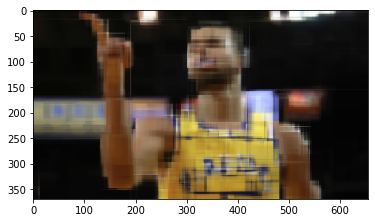

In [19]:
# grid search and pipeline test

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_rf = Pipeline([('clf', RandomForestRegressor(random_state = 1337))])

n_trees = [32, 64, 128]
max_depth = [10, 12, 16, 24]

grid_params_rf = [{'clf__n_estimators': n_trees,
                   'clf__max_depth': max_depth
                  }]

gs_rf = GridSearchCV(estimator = pipe_rf,
                     param_grid = grid_params_rf,
                     scoring = 'r2',
                     cv = 10, 
                     n_jobs = -1)

gs_rf.fit(X_train, y_train)
print('Best params: {}'.format(gs_rf.best_params_))
print('Best training accuracy: {:.3f}'.format(gs_rf.best_score_))

y_pred = gs_rf.predict(X_test)
y_pred = y_pred.reshape(369, 656, 3)

plt.imshow(y_pred)
plt.show()

The resulting image looks the way it does because each patch of color represents a decision boundary made by the model. The patches of color are rectangles and they are arranged to form the rough colors of the areas within with selected picture.

There can be 2^D patches of color if the forest contains a single decision tree. D is the depth of the decision tree. 

At most, there will be n(2^D) patches of color if the forest contains n decision trees. D is the depth of the decision tree.


In [18]:
pipe_rf

Pipeline(memory=None,
         steps=[('clf',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=1337,
                                       verbose=0, warm_start=False))],
         verbose=False)